In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
pickups_brooklyn = pd.read_csv('Pickups_Brooklyn_June.csv', delimiter=',')
pickups_brooklyn['pickup_datetime'] = pickups_brooklyn['pickup_datetime'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [3]:
pickups_brooklyn.head()

,Unnamed: 0,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance
0,20,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70
1,60,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02
2,71,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56
3,124,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20
4,139,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30


In [4]:
pickups_brooklyn['pickup_longitude'].values[0]

-74.016120910600009

In [5]:
pickups_brooklyn.head()

,Unnamed: 0,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance
0,20,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70
1,60,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02
2,71,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56
3,124,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20
4,139,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30


In [6]:
pickups_brooklyn.pickup_latitude.values[0]

40.710899353000002

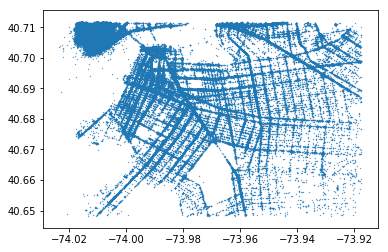

In [7]:
plt.scatter(pickups_brooklyn.pickup_longitude, pickups_brooklyn.pickup_latitude, s=0.1)

In [8]:
#plt.show()

In [9]:
def time_of_day(hour):
    if hour<6:
        return "night"
    elif hour<10:
        return "morning rush"
    elif hour<16:
        return "daytime"
    elif hour<19:
        return "evening_rush"
    else:
        return "night"

In [10]:
pickups_brooklyn['time_of_day'] = [time_of_day(x) for x in pickups_brooklyn['pickup_datetime'].dt.hour]

In [11]:
pickups_brooklyn.head()

,Unnamed: 0,pickup_datetime,pickup_longitude,pickup_latitude,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,passenger_count,trip_distance,time_of_day
0,20,2016-06-09 21:06:38,-74.016121,40.710899,1,5.0,2.00,0.0,8.30,1,0.70,night
1,60,2016-06-09 21:09:53,-74.008247,40.711269,1,10.0,3.39,0.0,14.69,1,2.02,night
2,71,2016-06-09 21:09:55,-74.016251,40.711048,1,19.0,4.06,0.0,24.36,1,5.56,night
3,124,2016-06-09 21:06:00,-74.003128,40.706345,1,20.0,2.20,0.0,23.50,1,4.20,night
4,139,2016-06-09 21:06:02,-73.987724,40.700386,1,11.5,1.00,0.0,13.80,1,2.30,night


In [12]:
np.unique(pickups_brooklyn.time_of_day.values)

array(['daytime', 'evening_rush', 'morning rush', 'night'], dtype=object)

In [13]:
times_of_day = ["night", "morning rush", "daytime", "evening_rush"]

In [14]:
pickups_brooklyn_tod = {}
x_tod = {}
y_tod = {}
coords_tod = {}
min_lon = []
max_lon = []
min_lat = []
max_lat = []
for time in times_of_day:
    pickups_brooklyn_tod[time] = pickups_brooklyn[pickups_brooklyn['time_of_day'] == time]
    y_tod[time] = pickups_brooklyn_tod[time]['pickup_latitude'].values
    x_tod[time] = pickups_brooklyn_tod[time]['pickup_longitude'].values
    min_lat.append(min(x_tod[time]))
    max_lat.append(max(x_tod[time]))
    min_lon.append(min(y_tod[time]))
    max_lon.append(max(y_tod[time]))

print("minimum lon: "+ str(min(min_lon)))
print("maximum lon: "+ str(max(max_lon)))
print("minimum lat: "+ str(min(min_lat)))
print("maximum lat: "+ str(max(max_lat)))


minimum lon: 40.648311615
maximum lon: 40.7115974426
minimum lat: -74.0235214233
maximum lat: -73.9177093506


In [15]:
for time in times_of_day:
    print(len(x_tod[time]))
    coords_tod[time] = []
    print(type(coords_tod[time]))
    for i in range(len(x_tod[time])):
        coords_tod[time].append([x_tod[time][i], y_tod[time][i]])

188919
<class 'list'>
65202
<class 'list'>
105150
<class 'list'>
57256
<class 'list'>


In [16]:
print(coords_tod['night'][:10])

[[-74.016120910600009, 40.710899353000002], [-74.008247375500005, 40.711269378699996], [-74.016250610399993, 40.711048126199998], [-74.003128051800005, 40.706344604499996], [-73.9877243042, 40.700386047399995], [-73.992584228500007, 40.6896362305], [-74.009445190400001, 40.710700988799999], [-73.977706909199995, 40.684486389200003], [-73.954879760699995, 40.710601806599996], [-74.004692077599998, 40.707168579099999]]


In [17]:
df1 = pd.DataFrame(x_tod['night'], y_tod['night'], )

In [18]:
df1 = df1.reset_index()

In [19]:
dft = {}
for time in times_of_day:
    d = {'longitude_x': x_tod[time], 'latitude_y': y_tod[time]}
    dft[time] = pd.DataFrame(d)

In [20]:
dft['night'].head()

,latitude_y,longitude_x
0,40.710899,-74.016121
1,40.711269,-74.008247
2,40.711048,-74.016251
3,40.706345,-74.003128
4,40.700386,-73.987724


In [21]:
dft = {}
for time in times_of_day:
    
    d = {'longitude_x': x_tod[time], 'latitude_y': y_tod[time]}
    dft[time] = pd.DataFrame(d)

In [22]:
dft['night'].head()

,latitude_y,longitude_x
0,40.710899,-74.016121
1,40.711269,-74.008247
2,40.711048,-74.016251
3,40.706345,-74.003128
4,40.700386,-73.987724


In [23]:
from sklearn.cluster import KMeans

In [24]:
K=5
k=KMeans(K)

In [25]:
dft['night'].head()

,latitude_y,longitude_x
0,40.710899,-74.016121
1,40.711269,-74.008247
2,40.711048,-74.016251
3,40.706345,-74.003128
4,40.700386,-73.987724


In [26]:
dft['night'].values

array([[ 40.71089935, -74.01612091],
       [ 40.71126938, -74.00824738],
       [ 40.71104813, -74.01625061],
       ..., 
       [ 40.66894913, -73.98654175],
       [ 40.70531464, -74.00951385],
       [ 40.70544052, -74.01699829]])

In [27]:
k.fit(dft['night'].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
dft_t = {}
dft_t['night'] = dft['night'].transpose()

In [29]:
dft_t['night']

,0,1,2,3,4,5,6,7,8,9,...,188909,188910,188911,188912,188913,188914,188915,188916,188917,188918
latitude_y,40.710899,40.711269,40.711048,40.706345,40.700386,40.689636,40.710701,40.684486,40.710602,40.707169,...,40.707932,40.687790,40.690880,40.687950,40.707184,40.709732,40.685322,40.668949,40.705315,40.705441
longitude_x,-74.016121,-74.008247,-74.016251,-74.003128,-73.987724,-73.992584,-74.009445,-73.977707,-73.954880,-74.004692,...,-74.017570,-73.989754,-73.991707,-73.990891,-73.923813,-74.014824,-73.964104,-73.986542,-74.009514,-74.016998


['teal', 'slateblue', 'red', 'cornsilk', 'orange']


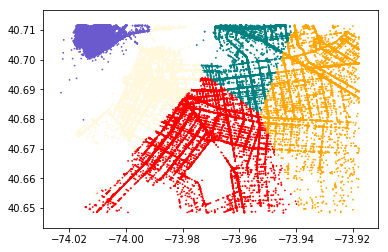

In [30]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(k.labels_))   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
print(cluster_colors)
x_=[]
y_=[]
c_=[]
for label, x, y in zip(k.labels_, dft['night']['longitude_x'].values, dft['night']['latitude_y'].values):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
    #plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=0.55,c=c_)

In [56]:
dft['night'].head()

,latitude_y,longitude_x,cluster
0,40.710899,-74.016121,0
1,40.711269,-74.008247,0
2,40.711048,-74.016251,0
3,40.706345,-74.003128,0
4,40.700386,-73.987724,2


In [31]:
from sklearn.metrics.pairwise import pairwise_distances

In [57]:
dft_sample = {}
dft_sample['night'] = dft['night'].sample(n=10000)

In [58]:
dft_sample['night']

,latitude_y,longitude_x,cluster
114986,40.677071,-73.972298,3
550,40.703041,-74.011414,0
124592,40.704288,-74.014374,0
112676,40.706020,-73.931770,4
172411,40.702301,-73.989487,2
178416,40.691269,-73.989662,2
130175,40.707211,-74.004089,0
147777,40.711346,-74.015884,0
155865,40.710751,-73.953987,1
156794,40.703411,-74.011047,0


In [72]:
dft_sample['night']['coord'] = np.nan

In [75]:
dft_sample['night'].head()

,latitude_y,longitude_x,cluster,coord
114986,40.677071,-73.972298,3,NaN
550,40.703041,-74.011414,0,NaN
124592,40.704288,-74.014374,0,NaN
112676,40.706020,-73.931770,4,NaN
172411,40.702301,-73.989487,2,NaN


In [109]:
sampleCoords = {}
sampleCoords['night'] = []
for x, y in zip(dft_sample['night']['longitude_x'].values, dft_sample['night']['latitude_y'].values):
    coords = [x, y]

In [110]:
coords = []
for i in range(len(dft_sample['night']['longitude_x'].values)):
    coords.append([dft_sample['night']['longitude_x'].values[i], dft_sample['night']['latitude_y'].values[i]])

In [111]:

diest = pairwise_distances(coords, metric='euclidean', n_jobs=1)

In [112]:
diest

array([[ 0.        ,  0.0469523 ,  0.05011199, ...,  0.03890058,
         0.05305966,  0.04457424],
       [ 0.0469523 ,  0.        ,  0.00321229, ...,  0.04883228,
         0.00741854,  0.0056755 ],
       [ 0.05011199,  0.00321229,  0.        , ...,  0.05058005,
         0.00577456,  0.00808228],
       ..., 
       [ 0.03890058,  0.04883228,  0.05058005, ...,  0.        ,
         0.05613676,  0.05104519],
       [ 0.05305966,  0.00741854,  0.00577456, ...,  0.05613676,
         0.        ,  0.00859635],
       [ 0.04457424,  0.0056755 ,  0.00808228, ...,  0.05104519,
         0.00859635,  0.        ]])

In [113]:
from sklearn.metrics import silhouette_score

In [114]:
silhouette_avg = silhouette_score(diest, dft_sample['night']['cluster'], metric="precomputed")

In [115]:
silhouette_avg

0.59130678211842447

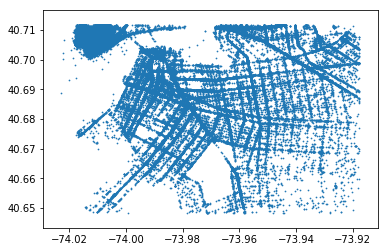

In [40]:
plt.scatter(dft['night']['longitude_x'].values, dft['night']['latitude_y'].values, s=0.5, )

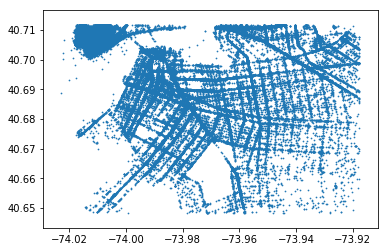

In [41]:
plt.scatter(x_tod['night'], y_tod['night'], s=0.5)

In [42]:
dft['night']['cluster']=k.fit_predict(dft['night'])

In [43]:
type(x_tod['night'][0])

numpy.float64

In [44]:
#axes = plt.scatter(x_tod["night"], y_tod["night"]).axes
#print(plt.Axes.get_ylim(axes))
#print(plt.Axes.get_xlim(axes))

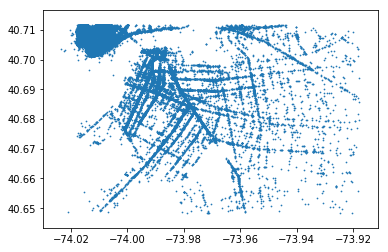

In [45]:
plt.scatter(x_tod["daytime"], y_tod["daytime"], s=0.5)

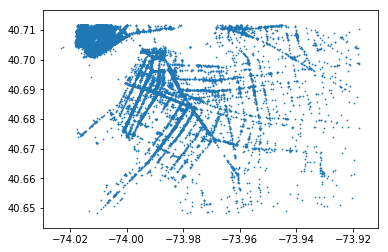

In [46]:
plt.scatter(x_tod["evening_rush"], y_tod["evening_rush"], s=0.5)

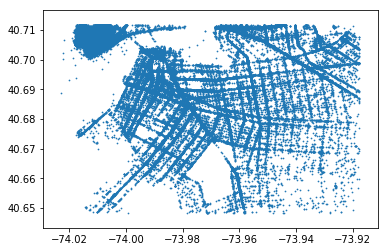

In [47]:
plt.scatter(x_tod['night'], y_tod['night'], s=0.5)

In [48]:
# Density based and K-Means

In [49]:
def createTrainAndTestSet(x, y):
    numTrain = len(x)*2/3
    x_train = x[:numTrain]
    y_train = y[numTrain:]
    x_test = x[:numTrain]
    y_test = y[numTrain:]

In [50]:
# K-Means, measure distortion and silhouette

In [51]:
from sklearn.cluster import KMeans

In [52]:
K=5
k=KMeans(K)

In [53]:
x_tod['evening_rush']

array([-74.00689697, -74.00456238, -74.01663208, ..., -74.00596619,
       -74.00708771, -74.00621033])

In [54]:
k.fit([x_tod['evening_rush'], y_tod['evening_rush']])

ValueError: n_samples=2 should be >= n_clusters=5

In [ ]:
# examine tips